In [89]:
import numpy as np 


In [90]:
!ls

English.txt
Hindi.txt
Names_indian.txt
bad-words.txt
bigram_numpy_yt.ipynb
bigram_pure_numpy_without_jax.ipynb
makemore.py
makemore_bigram.py
makemore_bigram_jax.py
makemore_bigram_part1.ipynb
makemore_part2_mlp.ipynb
makemore_part3_bn.ipynb
makemore_part4_backprop.ipynb
makemore_part5_cnn1.ipynb
names.txt
youtube-1.ipynb


In [91]:
words = open('Names_indian.txt', 'r').read().splitlines()
words2 = open('names.txt', 'r').read().splitlines()

In [92]:
words = words + words2

In [93]:
# temp = words
words = [w.lower() for w in words]
words[:3]

['aaban', 'aabharan', 'aabhas']

In [94]:
len(words)

87724

In [95]:
words[4200]

'balavadan'

In [96]:
min(len(w) for w in words)

2

In [97]:
max(len(w) for w in words)

25

In [98]:
# tokenizer 
chars = list(set(''.join(words)))
chars
stoi = {c:i for i,c in enumerate(chars)}

itos = {i:c for c,i in stoi.items()}

In [99]:
stoi

{'h': 0,
 'l': 1,
 'o': 2,
 ' ': 3,
 'c': 4,
 '.': 5,
 'a': 6,
 'i': 7,
 's': 8,
 'g': 9,
 'e': 10,
 'r': 11,
 'x': 12,
 'd': 13,
 '-': 14,
 'u': 15,
 'k': 16,
 't': 17,
 'y': 18,
 'n': 19,
 'p': 20,
 'f': 21,
 'q': 22,
 'b': 23,
 'v': 24,
 'm': 25,
 'j': 26,
 'w': 27,
 'z': 28}

In [100]:
itos

{0: 'h',
 1: 'l',
 2: 'o',
 3: ' ',
 4: 'c',
 5: '.',
 6: 'a',
 7: 'i',
 8: 's',
 9: 'g',
 10: 'e',
 11: 'r',
 12: 'x',
 13: 'd',
 14: '-',
 15: 'u',
 16: 'k',
 17: 't',
 18: 'y',
 19: 'n',
 20: 'p',
 21: 'f',
 22: 'q',
 23: 'b',
 24: 'v',
 25: 'm',
 26: 'j',
 27: 'w',
 28: 'z'}

In [103]:
string = "hello world"
string = "vivek"
ints = []
for c in string:
    ints.append(stoi[c])
print(ints)   

[24, 7, 24, 10, 16]


In [104]:
string = [24, 7, 24, 10, 16]
for i in string:
    
    print(itos[i])

v
i
v
e
k


In [124]:
# trigram
for w in words[:1]:
    chs = ['Start'] + list(w) + ['End']
    for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
        print(ch1,ch2,ch3)
        
    
    
    

Start a a
a a b
a b a
b a n
a n End


In [125]:
# bigram
bigr = {} 
for w in words:
    chs = ['Start'] + list(w) + ['End']
    for ch1,ch2 in zip(chs,chs[1:]):
#         print(ch1,ch2)
        bigram = (ch1,ch2)
        bigr[bigram] = bigr.get(bigram,0) + 1
        
        

In [61]:
sorted(bigr.items(), key = lambda x: -x[1])

[(('a', 'n'), 25103),
 (('h', 'a'), 17576),
 (('a', 'End'), 16716),
 (('n', 'End'), 13778),
 (('s', 'h'), 13542),
 (('t', 'h'), 13366),
 (('a', 'r'), 10363),
 (('r', 'a'), 9186),
 (('i', 'End'), 9144),
 (('h', 'i'), 8141),
 (('n', 'a'), 6941),
 (('Start', 'A'), 6774),
 (('y', 'a'), 6718),
 (('Start', 'S'), 5316),
 (('n', 'i'), 5305),
 (('a', 't'), 5088),
 (('a', 's'), 5078),
 (('i', 'n'), 5010),
 (('i', 't'), 4951),
 (('v', 'a'), 4676),
 (('h', 'End'), 4664),
 (('r', 'i'), 4629),
 (('k', 'a'), 4624),
 (('e', 'e'), 4319),
 (('Start', 'K'), 4314),
 (('i', 's'), 4278),
 (('Start', 'V'), 4187),
 (('l', 'a'), 3966),
 (('Start', 'M'), 3959),
 (('a', 'l'), 3843),
 (('a', 'a'), 3645),
 (('m', 'a'), 3637),
 (('Start', 'N'), 3607),
 (('a', 'm'), 3559),
 (('a', 'v'), 3542),
 (('e', 's'), 3509),
 (('Start', 'R'), 3443),
 (('i', 'k'), 3362),
 (('Start', 'P'), 3352),
 (('Start', 'D'), 3137),
 (('n', 't'), 3092),
 (('e', 'n'), 3041),
 (('Start', 'T'), 2941),
 (('i', 'r'), 2741),
 (('a', 'y'), 2716),


In [167]:
vocab_size = len(itos)
vocab_size

29

In [170]:
N = np.zeros((29,29), dtype = np.int32)
N.shape

(29, 29)

In [173]:
# create a probability distribution using the counts we got 
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
#         print(ch1,ch2)
#         print(ix1,ix2)
        N[ix1,ix2] += 1
    

In [174]:
N

array([[   42,   237,   814,    54,    31,  7073, 20879,  9089,   138,
           25,  3101,  1649,     0,    67,     0,  2732,   279,   298,
         1162,   984,    65,     2,     3,    25,   496,   628,    19,
          557,    22],
       [   40,  1928,  1119,    67,    41,  2557,  7302,  4228,   166,
           31,  3553,    63,     0,   173,     3,   569,    89,   105,
         1759,    71,    75,    26,     5,    84,   433,   152,    22,
           29,    20],
       [  532,   863,  1001,     1,   163,   962,   167,    85,  1146,
          403,   149,  1518,    52,   399,     0,   500,   338,   581,
          169,  2896,   310,    38,     4,   367,   449,   594,   242,
          360,   118],
       [    9,    29,     4,     0,    17,     0,    35,     2,   151,
           25,     1,    74,     0,    43,     0,     3,   171,    10,
            0,    45,   115,     0,     1,    34,    53,    55,    14,
            6,     0],
       [ 2471,   122,   403,     0,    57,   115,  1022,

In [175]:
N[0] # representing counts of all chars which came after h

array([   42,   237,   814,    54,    31,  7073, 20879,  9089,   138,
          25,  3101,  1649,     0,    67,     0,  2732,   279,   298,
        1162,   984,    65,     2,     3,    25,   496,   628,    19,
         557,    22])

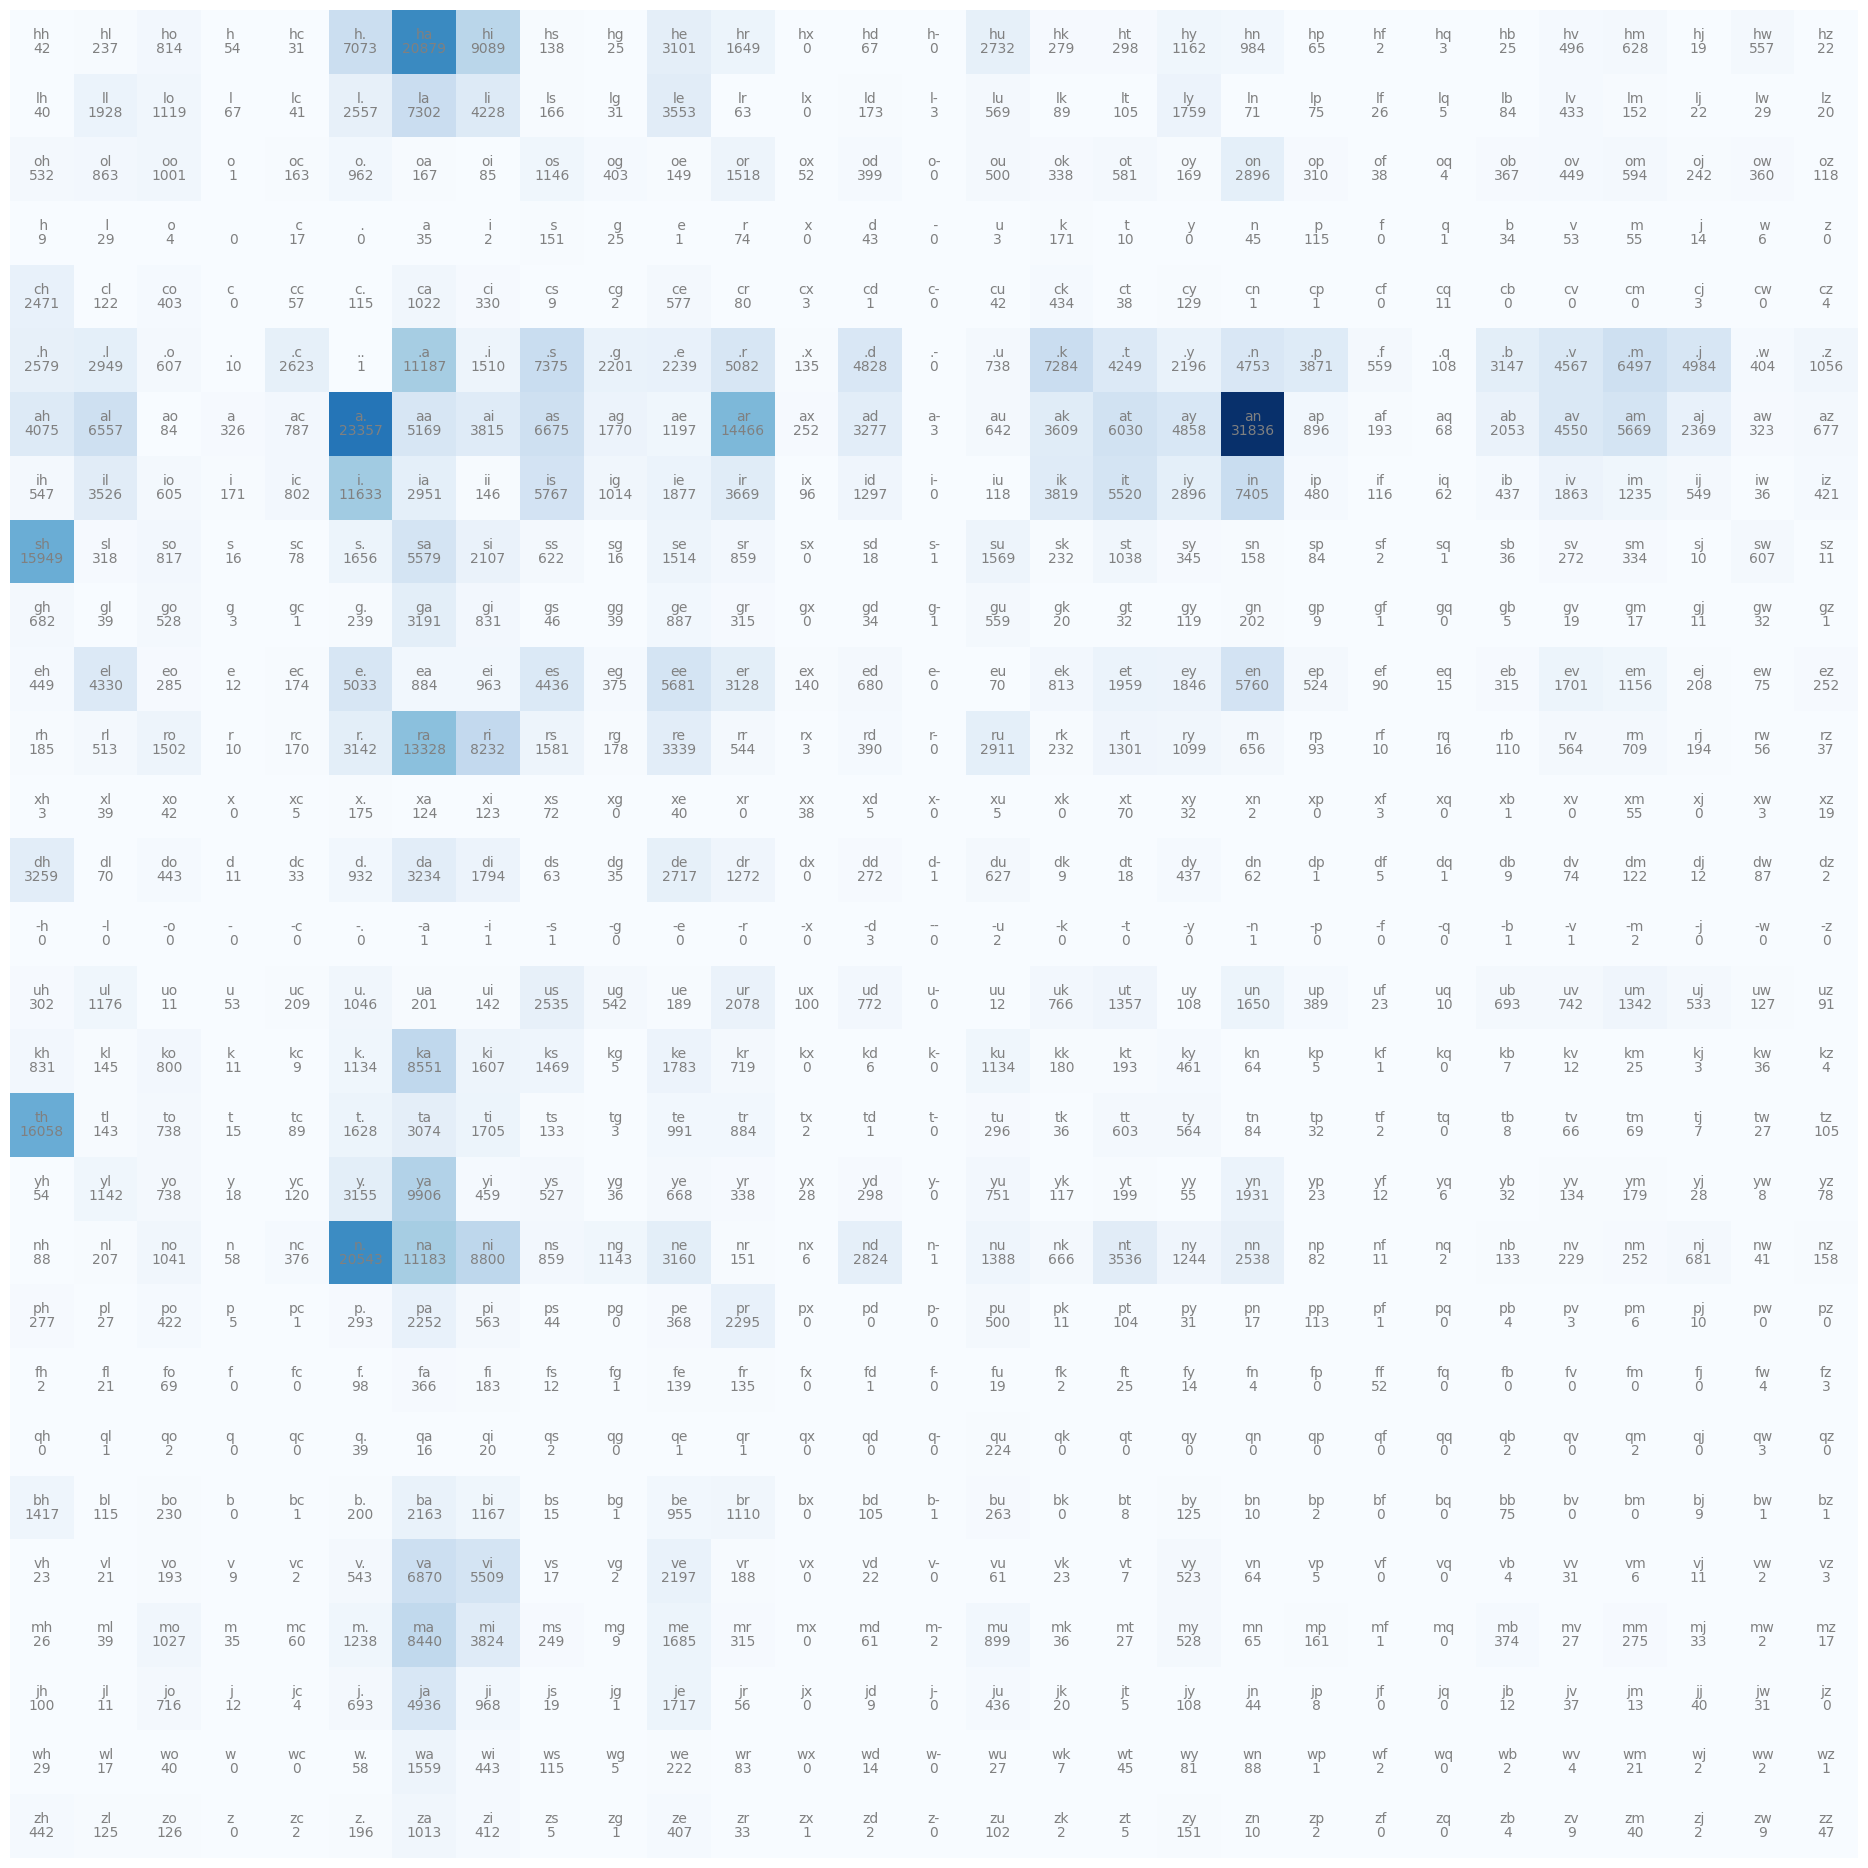

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(24,24))
plt.imshow(N, cmap='Blues')
for i in range(29):
    for j in range(29):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [177]:
N[0]

array([   42,   237,   814,    54,    31,  7073, 20879,  9089,   138,
          25,  3101,  1649,     0,    67,     0,  2732,   279,   298,
        1162,   984,    65,     2,     3,    25,   496,   628,    19,
         557,    22])

In [178]:
N[0].sum()

50471

In [186]:
prob = N[1]/N[1].sum()
prob.sum()

1.0

In [187]:
for i in range(29):
    prob = N[i]/N[i].sum()
    print(prob.sum())

0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999998
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
0.9999999999999998
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0000000000000002


In [220]:
M = N.copy()
M

array([[   42,   237,   814,    54,    31,  7073, 20879,  9089,   138,
           25,  3101,  1649,     0,    67,     0,  2732,   279,   298,
         1162,   984,    65,     2,     3,    25,   496,   628,    19,
          557,    22],
       [   40,  1928,  1119,    67,    41,  2557,  7302,  4228,   166,
           31,  3553,    63,     0,   173,     3,   569,    89,   105,
         1759,    71,    75,    26,     5,    84,   433,   152,    22,
           29,    20],
       [  532,   863,  1001,     1,   163,   962,   167,    85,  1146,
          403,   149,  1518,    52,   399,     0,   500,   338,   581,
          169,  2896,   310,    38,     4,   367,   449,   594,   242,
          360,   118],
       [    9,    29,     4,     0,    17,     0,    35,     2,   151,
           25,     1,    74,     0,    43,     0,     3,   171,    10,
            0,    45,   115,     0,     1,    34,    53,    55,    14,
            6,     0],
       [ 2471,   122,   403,     0,    57,   115,  1022,

In [239]:
sums = []

In [240]:
sums = M.sum(axis= 1)[:,np.newaxis]
sums.shape

(29, 1)

In [241]:
Prob = []
Prob = M / sums
Prob[2].sum()

1.0

In [244]:
Prob[1].sum()

1.0

In [ ]:
# 29 29 M
#  1  29       sums
# rules of broadcasting 

In [247]:
prob = Prob[0]


In [273]:
# generation 
np.random.seed(36345)


for i in range(10):
    start = '.'
    word = []
    while True:
        ix1 = stoi[start]
        prob = Prob[ix1]
        new = np.random.choice(len(prob), size = 1, p = prob)[0]

#         print(itos[new])
        
        if new == stoi['.']:
            
            break
        word.append(itos[new])    
        start = itos[new] 
    print(''.join(word))

an
jelevia
kkshlalishuxosangoonomaraariamadhaseyanaa
gareelennidseselyn
ana
ddeoushamesrekeshanuna
va
nya
lay
aitha
